In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline

UK house prices in 2017 visit https://www.gov.uk/guidance/about-the-price-paid-data for information on the data.

In [2]:
df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\UKHousingData\pp_2017.csv", header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{4E95D757-1CA7-EDA1-E050-A8C0630539E2},970000,2002-05-31 00:00,SW3 2BZ,F,N,L,46,FLAT 4,EGERTON GARDENS,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A
1,{4E95D757-1CBA-EDA1-E050-A8C0630539E2},280000,2002-06-28 00:00,SW5 9JZ,F,N,L,10,SECOND FLOOR FLAT,EARDLEY CRESCENT,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


In [3]:
#There are no labels provided with the data, so let's add some.
df.columns = ['id', 'price', 'transfer_date', 'postcode', 'type', 'new', 'duration',
            'paon', 'saon', 'street', 'locality', 'city', 'district', 'county', 'ppd_cat', 'record_status']
df.head(2)

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,{4E95D757-1CA7-EDA1-E050-A8C0630539E2},970000,2002-05-31 00:00,SW3 2BZ,F,N,L,46,FLAT 4,EGERTON GARDENS,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A
1,{4E95D757-1CBA-EDA1-E050-A8C0630539E2},280000,2002-06-28 00:00,SW5 9JZ,F,N,L,10,SECOND FLOOR FLAT,EARDLEY CRESCENT,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


The field new is binary and would be more useful as 1's and 0's.

In [4]:
def convert_binary(x, val1, val2):
    """Convert a binary field to 1's and 0's"""
    # True value
    if x == 'Y':
        return 1
    #False value
    elif x == 'N':
        return 0
    else:
        return np.nan
    
df.new = df.new.apply(convert_binary, args=('Y', 'N'))
df.head(2)

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,{4E95D757-1CA7-EDA1-E050-A8C0630539E2},970000,2002-05-31 00:00,SW3 2BZ,F,0,L,46,FLAT 4,EGERTON GARDENS,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A
1,{4E95D757-1CBA-EDA1-E050-A8C0630539E2},280000,2002-06-28 00:00,SW5 9JZ,F,0,L,10,SECOND FLOOR FLAT,EARDLEY CRESCENT,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


In [5]:
#get rid of id
id_col = df.pop('id')


In [7]:
df.head(2)

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,970000,2002-05-31 00:00,SW3 2BZ,F,0,L,46,FLAT 4,EGERTON GARDENS,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A
1,280000,2002-06-28 00:00,SW5 9JZ,F,0,L,10,SECOND FLOOR FLAT,EARDLEY CRESCENT,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A


##### Basic exploratory analysis

In [8]:
len(df)

81332

In [9]:
#datatypes
for col in df.columns:
    print('{0} : {1}'.format(col, df[col].dtype))

price : int64
transfer_date : object
postcode : object
type : object
new : int64
duration : object
paon : object
saon : object
street : object
locality : object
city : object
district : object
county : object
ppd_cat : object
record_status : object


In [10]:
df.describe()

,price,new
count,8.133200e+04,81332.000000
mean,3.332896e+05,0.128031
std,1.178570e+06,0.334126
min,1.000000e+00,0.000000
25%,1.350000e+05,0.000000
50%,2.140000e+05,0.000000
75%,3.400000e+05,0.000000
max,1.255000e+08,1.000000


###### How many and what percentage of property sales were newly built?
Side note: It would be interesting to look at all the data back from 1995 for new/old houses and their prices.

In [11]:
total_new = df.new.sum()
percentage_new = total_new / len(df) * 100
print('Total new: {0}  | Percentage new: {1}'.format(total_new, percentage_new))

Total new: 10413  | Percentage new: 12.80307873899572


###### How are the prices distributed?

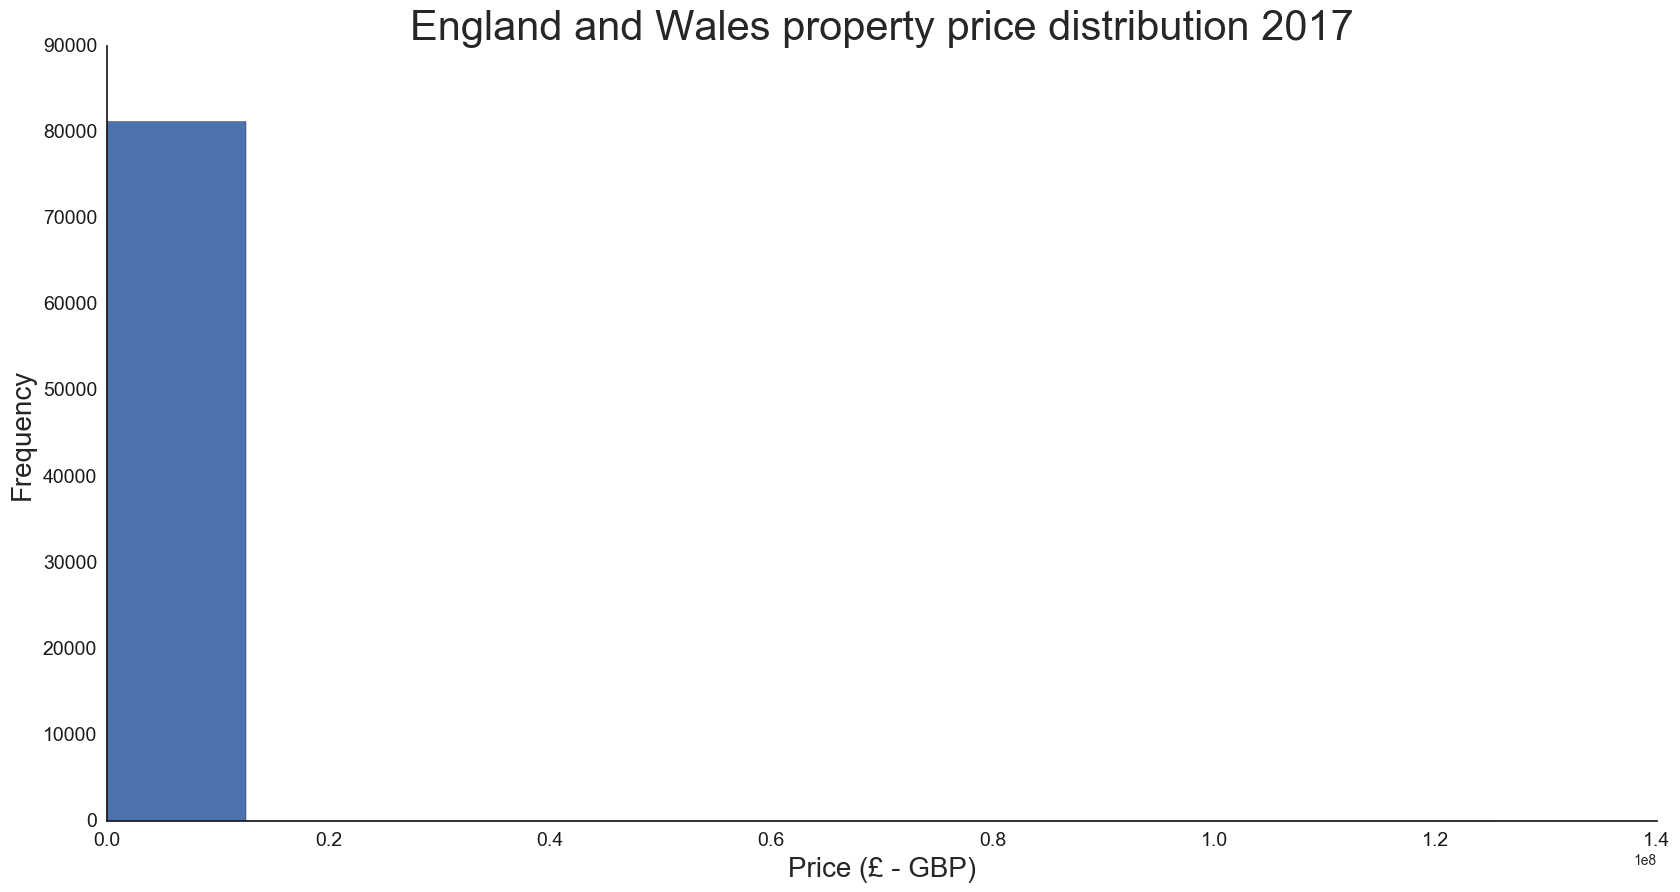

In [15]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14, color='#1a1a1a')  
plt.yticks(fontsize=14, color='#1a1a1a')

plt.title('England and Wales property price distribution 2017', fontsize=30)
plt.xlabel('Price (£ - GBP)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.hist(df.price, bins=10);

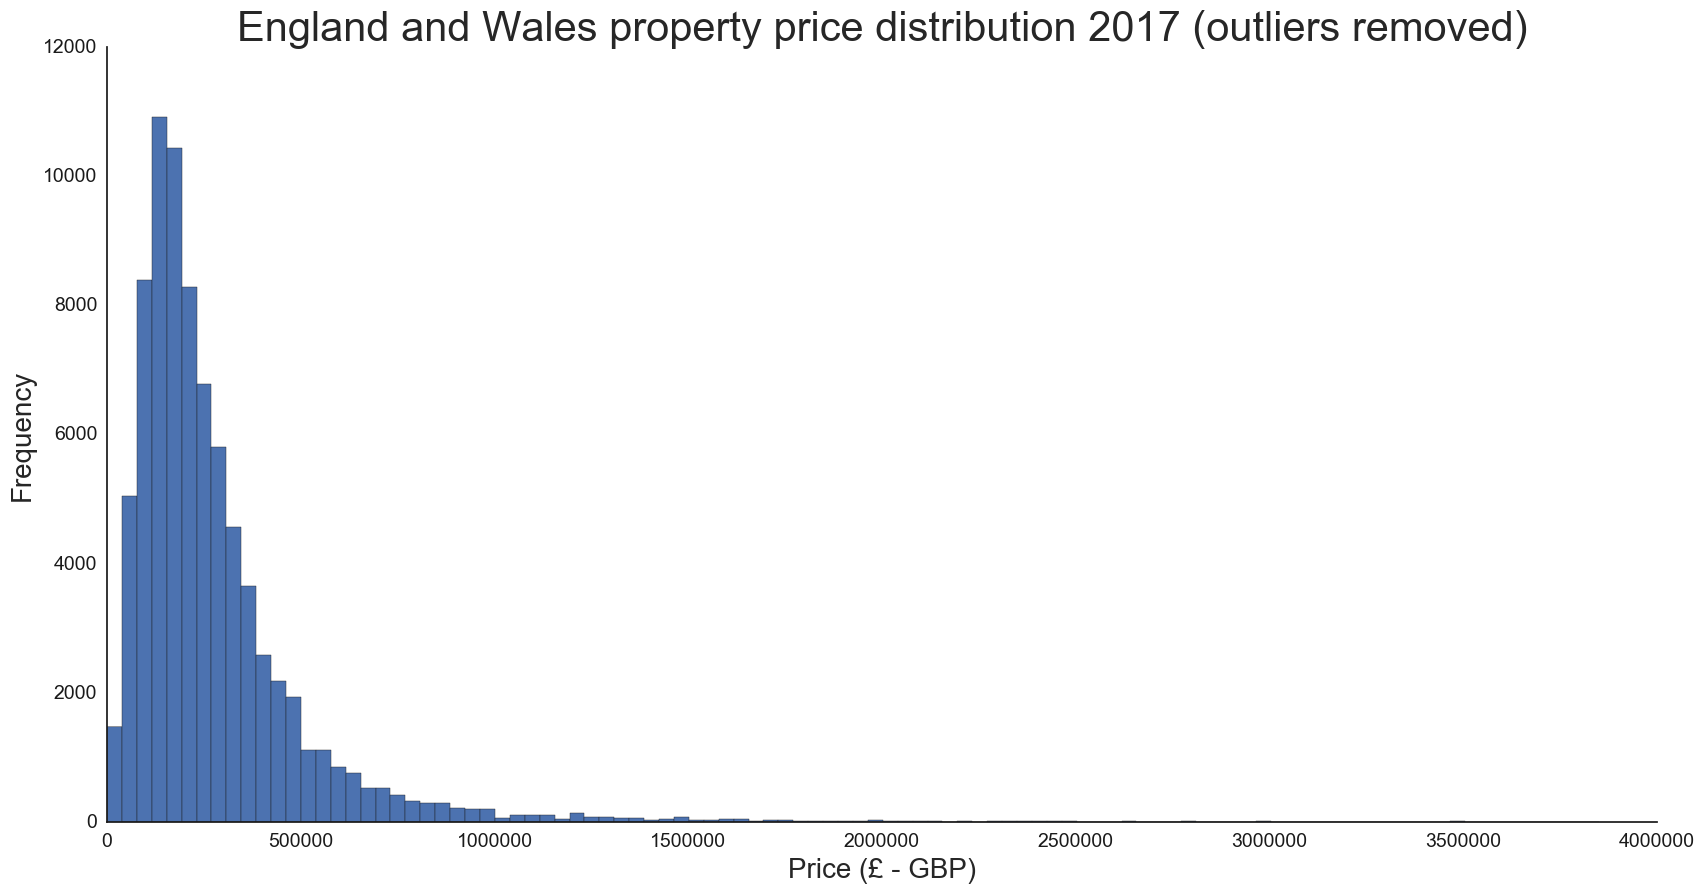

In [17]:
no_outliers = df[np.abs(df.price-df.price.mean())<=(3*df.price.std())]

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14, color='#1a1a1a')  
plt.yticks(fontsize=14, color='#1a1a1a')

plt.title('England and Wales property price distribution 2017 (outliers removed)', fontsize=30)
plt.xlabel('Price (£ - GBP)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.hist(no_outliers.price, bins=100);

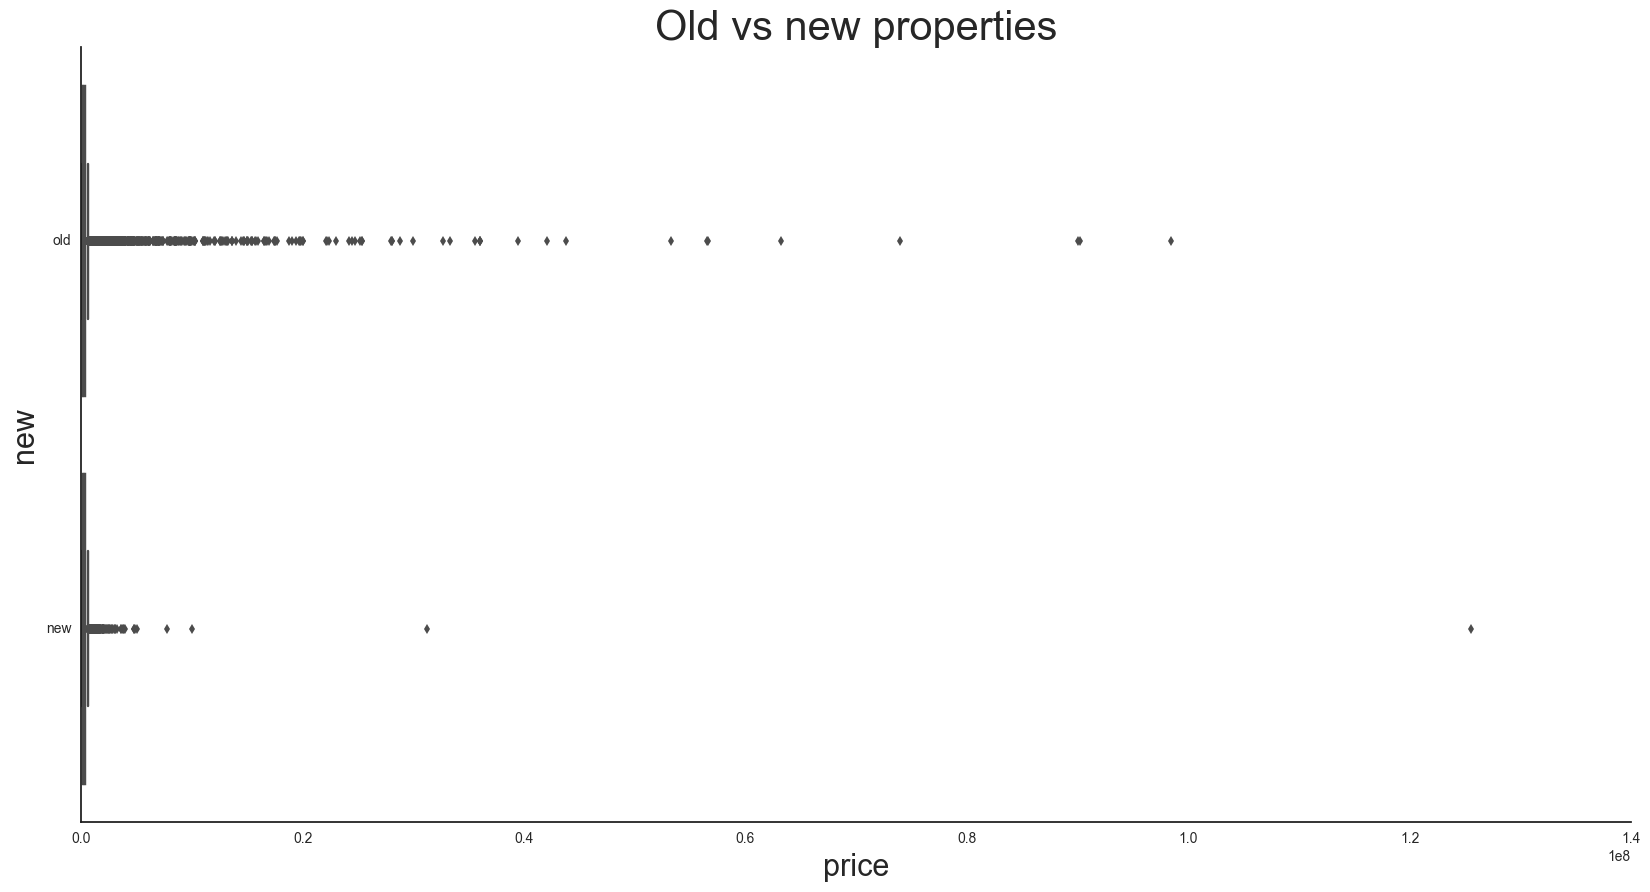

In [18]:
#How do the prices of old and new properties compare?

fig, ax = plt.subplots(figsize=(20, 10))

ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)

ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

plt.title('Old vs new properties', fontsize=30)
plt.ylabel('Property ages', fontsize=22)
plt.xlabel('Price', fontsize=22)

boxplot = sns.boxplot(x=df.price, y=df.new, orient='h')
boxplot.set(yticklabels=['old', 'new']);

###### Where are new properties being built?
First we need to get the latitude and longitude of each property. We will use the postcode to find the approximate longitude and lattitude of the property which is accurate enough for our purposes.
Postcode longitide and lattitude obtained from https://www.doogal.co.uk/files/postcodes.zip

In [21]:
postcodes = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\UKHousingData\postcodes.csv", usecols=['Postcode', 'Latitude', 'Longitude'])
postcodes.columns = ['postcode', 'lat', 'lon']
postcodes.head()

,postcode,lat,lon
0,AB1 0AA,57.101478,-2.242852
1,AB1 0AB,57.102558,-2.246309
2,AB1 0AD,57.100560,-2.248342
3,AB1 0AE,57.084447,-2.255708
4,AB1 0AF,57.096659,-2.258103


In [36]:
df = df.merge(postcodes, on='postcode')
df.head(2)

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,...,district,county,ppd_cat,record_status,lat_x,lon_x,lat_y,lon_y,lat,lon
0,970000,2002-05-31 00:00,SW3 2BZ,F,0,L,46,FLAT 4,EGERTON GARDENS,NaN,...,KENSINGTON AND CHELSEA,GREATER LONDON,A,A,51.49648,-0.168078,51.49648,-0.168078,51.49648,-0.168078
1,700000,2001-12-14 00:00,SW3 2BZ,F,0,L,46,FLAT 4,EGERTON GARDENS,NaN,...,KENSINGTON AND CHELSEA,GREATER LONDON,A,A,51.49648,-0.168078,51.49648,-0.168078,51.49648,-0.168078


There are too many points to plot onto the map, so we will count how many new houses were built on each postcode area and plot them instead.

In [57]:
new = df[df.new == 1]
new_areas = pd.DataFrame(new.groupby(new.postcode.str.extract(r'(\D+)')).postcode.count())


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [58]:
new.head(5)

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,...,district,county,ppd_cat,record_status,lat_x,lon_x,lat_y,lon_y,lat,lon
53,108000,2001-03-07 00:00,OX3 8PD,D,1,F,2A,NaN,WEYLAND ROAD,HEADINGTON,...,OXFORD,OXFORDSHIRE,A,A,51.756812,-1.202093,51.756812,-1.202093,51.756812,-1.202093
55,116950,2002-05-10 00:00,CF10 4AQ,F,1,L,ROMA HOUSE,29,VELLACOTT CLOSE,NaN,...,CARDIFF,CARDIFF,A,C,51.473407,-3.169933,51.473407,-3.169933,51.473407,-3.169933
56,130000,2002-05-10 00:00,CF10 4AQ,F,1,L,ROMA HOUSE,28,VELLACOTT CLOSE,NaN,...,CARDIFF,CARDIFF,A,C,51.473407,-3.169933,51.473407,-3.169933,51.473407,-3.169933
70,209995,2002-07-03 00:00,CV32 5LD,F,1,L,"CLARENCE MANSIONS, 1",3,CLARENCE TERRACE,NaN,...,WARWICK,WARWICKSHIRE,A,C,52.291597,-1.539494,52.291597,-1.539494,52.291597,-1.539494
71,219995,2002-04-26 00:00,CV32 5LD,F,1,L,"CLARENCE MANSIONS, 5",28,CLARENCE TERRACE,NaN,...,WARWICK,WARWICKSHIRE,A,C,52.291597,-1.539494,52.291597,-1.539494,52.291597,-1.539494


In [59]:
new_areas.columns = ['count']
new_areas.index.names = ['area']
new_areas = new_areas.reset_index()
new_areas.head(10)

,area,count
0,AL,25
1,B,159
2,BA,78
3,BB,95
4,BD,81
5,BH,55
6,BL,17
7,BN,78
8,BR,37
9,BS,139


We need a location for these postcode areas to plot. We will take the mean of all the points in each area to find an approximate location.

In [60]:
def get_by_area(area, df):
    result = df[(new.postcode.str.match('{}[^a-zA-Z].+'.format(area))) & (~new.lat.isnull()) & (~new.lon.isnull())]
        return result

def get_mean_area_lat_lon(area, df):
    area_houses = get_by_area(area, df) 
    mean_lat_lon = area_houses.lat.mean(), area_houses.lon.mean()
    
    return mean_lat_lon



In [61]:
new_areas['pos'] = new_areas.area.apply(get_mean_area_lat_lon, args=(new,))
new_areas.head()

,area,count,pos
0,AL,25,"(51.79767856, -0.22621484)"
1,B,159,"(52.4654814402516, -1.8306317987421385)"
2,BA,78,"(51.20760733333335, -2.4713031410256425)"
3,BB,95,"(53.79115375789466, -2.304298536842111)"
4,BD,81,"(53.795650197530854, -1.7898112098765424)"


#### Let's plot them on a map, the size correlates to how many new houses are in that area.

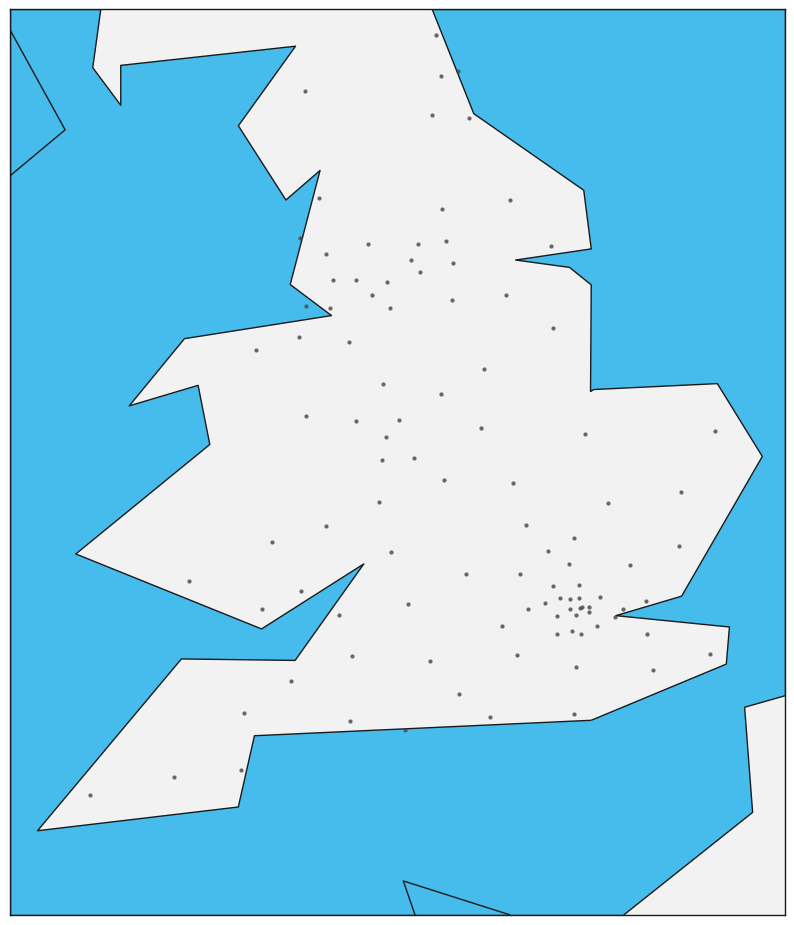

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

def plot_area(pos):
    count = new_areas.loc[new_areas.pos == pos]['count']
    x, y = m(pos[1], pos[0])
    size = (count/1000) ** 2 + 3
    m.plot(x, y, 'o', markersize=size, color='#444444', alpha=0.8)
    
new_areas.pos.apply(plot_area)

m

Plotting points onto a Basemap map is very easy. A few things to note about the below code though, are that my data is stored in a Pandas DataFrame called new_areas, the location of these areas are in new_areas.pos and the number of newly built houses in that area is in new_areas.count.

What we are doing here is making a function that takes a position and then plots the number of new houses associated with that position onto our map represented by the size of the point. Then using apply() on our Pandas DataFrame’s pos column we go through every position in our DataFrame and plot them onto our map.



Next let's draw postcode boundaries on the map and colour them depending on how many new houses in that area. The darker the colour, the more new houses in the area.

USING SHAPEFILES TO DRAW AREAS AND REGIONS

Now we have a map that can transmit information, but what if we want to represent regions or specific areas on our map. For example in the we have UK counties or in the USA, states. We can do this using shapefiles. I will be drawing in England and Wales postcode boundaries using the shapefile which can be found here.